Natural Language Processing using Machine Learning Algorithms to predict the ratings of a yelp review from the text of the message.

In [1]:
import numpy as np
import pandas as pd

In [2]:
yelp = pd.read_csv("yelp.csv")

Understanding the attributes and signficance of columns/variables in the yelp dataset.

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


Adding a feature to the existing yelp dataset

In [6]:
yelp['text length'] = yelp["text"].apply(len)

Data Visualization using Seaborn and Matplotlib

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

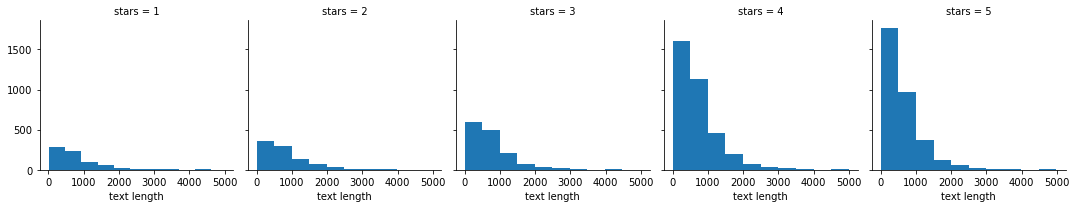

In [8]:
g = sns.FacetGrid(data = yelp, col = "stars")
g.map(plt.hist, "text length")

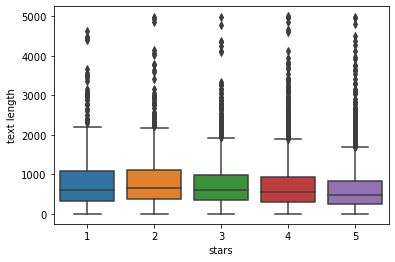

In [9]:
sns.boxplot(x='stars', y = 'text length', data = yelp)

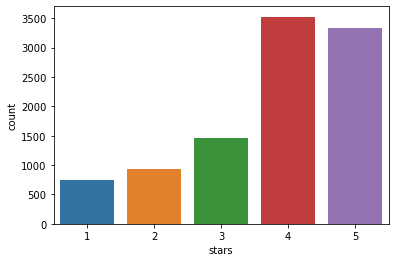

In [10]:
sns.countplot(x= 'stars', data = yelp)

In [11]:
stars = yelp.groupby('stars').mean()

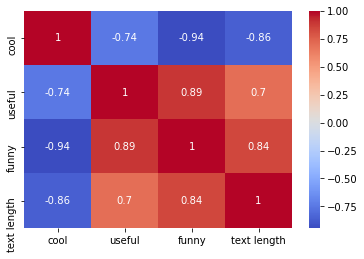

In [12]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

Using NLTK to predict the number of stars. To simplify predicition risk analysis parameterization, we'll only focus on  cases where stars are quantified through a spectrum of 1 through 5 stars.

In [13]:
yelp_class=yelp[(yelp['stars'] == 1) | (yelp['stars'] ==5)]
x = yelp_class['text']
y = yelp_class['stars']

Using Count Vectorizer to transform the matrix into a sparse matrix, a bag or an organized aggregate space of words, where unique words are on the top and the rows/records equal the number of entries.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [15]:
X = cv.fit_transform(x)

Partitioning the data and training a Multinomial Naive Bayes Model in the sklearn library

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
model = MultinomialNB().fit(x_train, y_train)

Now that the model is trained, we can predict values and evaluate the accuracy of our model.

In [20]:
predictions = model.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[160  66]
 [ 37 963]]


              precision    recall  f1-score   support

           1       0.81      0.71      0.76       226
           5       0.94      0.96      0.95      1000

    accuracy                           0.92      1226
   macro avg       0.87      0.84      0.85      1226
weighted avg       0.91      0.92      0.91      1226



The model can predict one or five star ratings of the yelp review with 90% accuracy. An alternative is using pipelining to speed up the process of fitting and transforming along with Tf-IDF in order to assign importance to key words.

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

Creating the pipeline.

In [24]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Re-partitioning the data and training the pipeline model.

In [25]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [26]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

Predicting between 1 or 5 star ratings given the text using the pipeline model to evaluate the accuracy of the model.

In [27]:
predictions = pipeline.predict(X_test)

In [28]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#ignore warning

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using tf-idf transformer to place a larger importance on the key words of a message actually DECREASED the accuracy of predicting between 1 and 5 star ratings: from 90% to 73%.